In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
myopia_data = pd.read_csv("./Data/Data_main/myopia.csv",sep=";")

In [3]:
myopia_data.info()
myopia_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   MYOPIC     618 non-null    int64  
 3   AGE        618 non-null    int64  
 4   GENDER     618 non-null    int64  
 5   SPHEQ      618 non-null    float64
 6   AL         618 non-null    float64
 7   ACD        618 non-null    float64
 8   LT         618 non-null    float64
 9   VCD        618 non-null    float64
 10  SPORTHR    618 non-null    int64  
 11  READHR     618 non-null    int64  
 12  COMPHR     618 non-null    int64  
 13  STUDYHR    618 non-null    int64  
 14  TVHR       618 non-null    int64  
 15  DIOPTERHR  618 non-null    int64  
 16  MOMMY      618 non-null    int64  
 17  DADMY      618 non-null    int64  
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,0,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,0,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0


a mayor AL menor potencia  mayor potencial de miope

In [11]:
array_spheq = np.array(myopia_data["SPHEQ"])
array_al = np.array(myopia_data["AL"])
array_miop = np.array(myopia_data["MYOPIC"])

<AxesSubplot:>

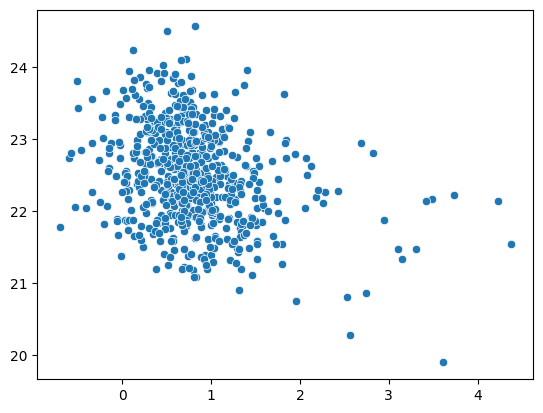

In [12]:
sns.scatterplot(x=array_spheq, y=array_al)

In [13]:
np.corrcoef(array_spheq, array_al)

array([[ 1.        , -0.30551199],
       [-0.30551199,  1.        ]])

In [14]:
myopia_data.groupby("STUDYYEAR")["MYOPIC"].head().count()

30

In [50]:
eye_dis = pd.read_csv("./Data/Data_main/Prevelance of Eye Diseases in US.csv")

In [51]:
eye_dis["prevalence_rate"] = eye_dis["prevalence_rate"].str.replace('"',"").str.replace(",",".").astype(float)


In [52]:
eye_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            52260 non-null  object 
 1   vision_problem   52260 non-null  object 
 2   race             52260 non-null  object 
 3   sex              52260 non-null  object 
 4   age              52260 non-null  object 
 5   number_of_cases  52260 non-null  int64  
 6   prevalence_rate  52260 non-null  float64
 7   population       52260 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [53]:
eye_dis[["race","vision_problem"]]

,race,vision_problem
0,ALL,AMD
1,ALL,AMD
2,ALL,AMD
3,ALL,AMD
4,ALL,AMD
...,...,...
52255,WHITE,VISION_IMPAIRMENT
52256,WHITE,VISION_IMPAIRMENT
52257,WHITE,VISION_IMPAIRMENT
52258,WHITE,VISION_IMPAIRMENT


# Dos dataframes , Uno Solo EEUU y otro de estados

AMD = Age-Related Macular Degeneration

In [56]:
todo_usa = eye_dis[eye_dis["state"] == "UNITED_STATES"]
cond_1 = eye_dis["age"] == "ALL"
cond_2 = eye_dis["state"] == "UNITED_STATES"
cond_3 = eye_dis["race"] == "ALL"
cond_4 = eye_dis["sex"] == "ALL"
todo_usa


,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
0,UNITED_STATES,AMD,ALL,ALL,ALL,2069403,0.0209,142648393
1,UNITED_STATES,AMD,ALL,ALL,50-54,79268,0.0036,22298125
2,UNITED_STATES,AMD,ALL,ALL,55-59,81083,0.0041,19664805
3,UNITED_STATES,AMD,ALL,ALL,60-64,95553,0.0057,16817924
4,UNITED_STATES,AMD,ALL,ALL,65-69,113107,0.0091,12435263
...,...,...,...,...,...,...,...,...
1000,UNITED_STATES,VISION_IMPAIRMENT,WHITE,MALE,60-64,33436,0.0054,6244884
1001,UNITED_STATES,VISION_IMPAIRMENT,WHITE,MALE,65-69,42138,0.0091,4624945
1002,UNITED_STATES,VISION_IMPAIRMENT,WHITE,MALE,70-74,58339,0.0173,3371204
1003,UNITED_STATES,VISION_IMPAIRMENT,WHITE,MALE,75-79,94328,0.0364,2591681


In [57]:
todo_usa_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_4]
todo_usa_all

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
0,UNITED_STATES,AMD,ALL,ALL,ALL,2069403,0.0209,142648393
120,UNITED_STATES,BLINDNESS,ALL,ALL,ALL,1288275,0.0090,142648393
255,UNITED_STATES,CATARACT,ALL,ALL,ALL,24409978,0.1711,142648393
390,UNITED_STATES,DIABETIC_RETINOPATHY,ALL,ALL,ALL,7685237,0.0539,142648393
465,UNITED_STATES,GLAUCOMA,ALL,ALL,ALL,2719379,0.0191,142648393
600,UNITED_STATES,HYPEROPIA,ALL,ALL,ALL,14186819,0.0995,142648393
735,UNITED_STATES,MYOPIA,ALL,ALL,ALL,34119279,0.2392,142648393
870,UNITED_STATES,VISION_IMPAIRMENT,ALL,ALL,ALL,2907691,0.0204,142648393


In [59]:
todo_states = eye_dis[eye_dis["state"] != "UNITED_STATES"]
todo_states

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
1005,ALABAMA,AMD,ALL,ALL,ALL,30359,0.0191,2250750
1006,ALABAMA,AMD,ALL,ALL,50-54,1245,0.0036,347485
1007,ALABAMA,AMD,ALL,ALL,55-59,1304,0.0042,311906
1008,ALABAMA,AMD,ALL,ALL,60-64,1568,0.0057,276127
1009,ALABAMA,AMD,ALL,ALL,65-69,1902,0.0091,209637
...,...,...,...,...,...,...,...,...
52255,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,60-64,83,0.0053,15605
52256,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,65-69,98,0.0091,10764
52257,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,70-74,130,0.0172,7554
52258,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,75-79,192,0.0362,5312


In [60]:
cond_1 = eye_dis["age"] == "ALL"
cond_2 = eye_dis["race"] == "ALL"
cond_3 = eye_dis["sex"] == "ALL"

In [81]:
todo_states_all = todo_states[cond_1 & cond_2 & cond_3]

C:\Users\Tiago\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [82]:
todo_states_all

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
1005,ALABAMA,AMD,ALL,ALL,ALL,30359,0.0191,2250750
1125,ALABAMA,BLINDNESS,ALL,ALL,ALL,19527,0.0090,2250750
1260,ALABAMA,CATARACT,ALL,ALL,ALL,387030,0.1720,2250750
1395,ALABAMA,DIABETIC_RETINOPATHY,ALL,ALL,ALL,117199,0.0521,2250750
1470,ALABAMA,GLAUCOMA,ALL,ALL,ALL,46778,0.0208,2250750
...,...,...,...,...,...,...,...,...
51645,WYOMING,DIABETIC_RETINOPATHY,ALL,ALL,ALL,13440,0.0516,260285
51720,WYOMING,GLAUCOMA,ALL,ALL,ALL,4133,0.0159,260285
51855,WYOMING,HYPEROPIA,ALL,ALL,ALL,27339,0.1050,260285
51990,WYOMING,MYOPIA,ALL,ALL,ALL,67008,0.2574,260285


In [83]:
problemas_vision_estados = todo_states_all.groupby(["state","vision_problem"])["prevalence_rate"].max().sort_values(ascending=False)

In [89]:
problemas_vision_estados


state          vision_problem
NEW_HAMPSHIRE  MYOPIA            0.2687
VERMONT        MYOPIA            0.2639
MAINE          MYOPIA            0.2622
UTAH           MYOPIA            0.2617
MINNESOTA      MYOPIA            0.2616
                                  ...  
TEXAS          BLINDNESS         0.0070
COLORADO       BLINDNESS         0.0070
NEW_MEXICO     BLINDNESS         0.0070
NEVADA         BLINDNESS         0.0060
ALASKA         BLINDNESS         0.0050
Name: prevalence_rate, Length: 408, dtype: float64

In [22]:
todo_usa_all["number_of_cases"].sum()

89386061

In [23]:
todo_usa_all["number_of_cases"].sum() / todo_usa_all["population"]

0      0.626618
120    0.626618
255    0.626618
390    0.626618
465    0.626618
600    0.626618
735    0.626618
870    0.626618
Name: population, dtype: float64

El 62,66 % de la muestra de 142648393 tiene algun tipo de problema grave de visión

In [40]:
todo_usa_all.groupby(["state","vision_problem"]).head()

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
0,UNITED_STATES,AMD,ALL,ALL,ALL,2069403,0.0209,142648393
120,UNITED_STATES,BLINDNESS,ALL,ALL,ALL,1288275,0.0090,142648393
255,UNITED_STATES,CATARACT,ALL,ALL,ALL,24409978,0.1711,142648393
390,UNITED_STATES,DIABETIC_RETINOPATHY,ALL,ALL,ALL,7685237,0.0539,142648393
465,UNITED_STATES,GLAUCOMA,ALL,ALL,ALL,2719379,0.0191,142648393
600,UNITED_STATES,HYPEROPIA,ALL,ALL,ALL,14186819,0.0995,142648393
735,UNITED_STATES,MYOPIA,ALL,ALL,ALL,34119279,0.2392,142648393
870,UNITED_STATES,VISION_IMPAIRMENT,ALL,ALL,ALL,2907691,0.0204,142648393


In [75]:
todo_usa_all.groupby(["state","vision_problem"])["prevalence_rate"].max().sort_values(ascending=False)

state          vision_problem      
UNITED_STATES  MYOPIA                  0.2392
               CATARACT                0.1711
               HYPEROPIA               0.0995
               DIABETIC_RETINOPATHY    0.0539
               AMD                     0.0209
               VISION_IMPAIRMENT       0.0204
               GLAUCOMA                0.0191
               BLINDNESS               0.0090
Name: prevalence_rate, dtype: float64

In [34]:
cada_problema

0      142648393
120    142648393
255    142648393
390    142648393
465    142648393
600    142648393
735    142648393
870    142648393
Name: population, dtype: int64

In [14]:
todo_usa_all["prevalence_rate"].sum()

0.6331

In [15]:
todo_usa = todo_usa[["state","race"]]
todo_usa

,state,race
0,UNITED_STATES,ALL
1,UNITED_STATES,ALL
2,UNITED_STATES,ALL
3,UNITED_STATES,ALL
4,UNITED_STATES,ALL
...,...,...
1000,UNITED_STATES,WHITE
1001,UNITED_STATES,WHITE
1002,UNITED_STATES,WHITE
1003,UNITED_STATES,WHITE


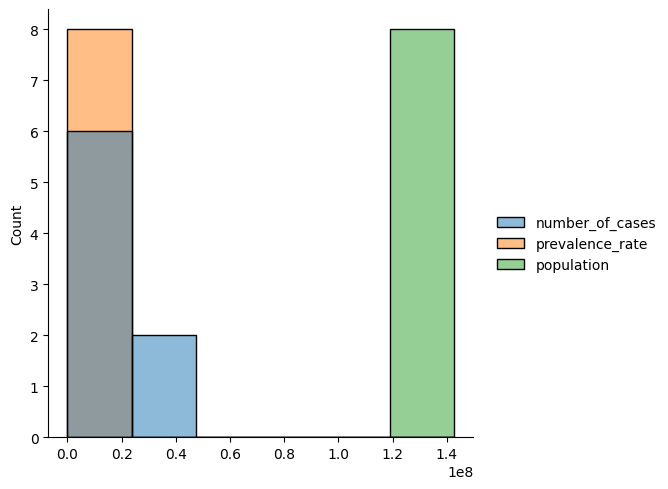

In [16]:
sns.displot(todo_usa_all , color="dodgerblue", label="vision_problem")

## Un dataframe por tipo de problema

In [17]:
miopia_gen= eye_dis[eye_dis["vision_problem"] == "MYOPIA"]
hipermetropia_gen = eye_dis[eye_dis["vision_problem"] == "HYPEROPIA"]
amd_gen = eye_dis[eye_dis["vision_problem"] == "AMD"]
blindness_gen = eye_dis[eye_dis["vision_problem"] == "BLINDNESS"]
cataratas_gen = eye_dis[eye_dis["vision_problem"] == "CATARACT"]
retinodiabetica_gen = eye_dis[eye_dis["vision_problem"] == "DIABETIC_RETINOPATHY"]
glaucoma_gen = eye_dis[eye_dis["vision_problem"] == "GLAUCOMA"]
blindness_gen = eye_dis[eye_dis["vision_problem"] == "VISION_IMPAIRMENT"]



## Hacemos diferencias entre estados de cada problema concreto

In [18]:
miopia_p_state = miopia_gen.groupby(["state"])["number_of_cases"]
for i in miopia_p_state:
    print(i)

('ALABAMA', 1740    525188
1741    227291
1742     84911
1743     62715
1744     48051
         ...  
1870     19561
1871     13905
1872     10072
1873      7559
1874      9566
Name: number_of_cases, Length: 135, dtype: int64)
('ALASKA', 2745    77104
2746    36585
2747    14517
2748    10620
2749     6545
        ...  
2875     2919
2876     1618
2877      866
2878      552
2879      668
Name: number_of_cases, Length: 135, dtype: int64)
('ARIZONA', 3750    671647
3751    282641
3752    103180
3753     77844
3754     63279
         ...  
3880     25035
3881     19295
3882     14589
3883     11325
3884     15873
Name: number_of_cases, Length: 135, dtype: int64)
('ARKANSAS', 4755    329724
4756    140485
4757     51758
4758     38786
4759     30375
         ...  
4885     13099
4886      9810
4887      7226
4888      5375
4889      7174
Name: number_of_cases, Length: 135, dtype: int64)
('CALIFORNIA', 5760    3633510
5761    1646996
5762     588090
5763     425691
5764     309060
        

In [19]:
eye_dis["vision_problem"].unique()

array(['AMD', 'BLINDNESS', 'CATARACT', 'DIABETIC_RETINOPATHY', 'GLAUCOMA',
       'HYPEROPIA', 'MYOPIA', 'VISION_IMPAIRMENT'], dtype=object)

In [20]:
eye_dis["state"].unique()

array(['UNITED_STATES', 'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE',
       'DISTRICT_OF_COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [21]:
eye_dis.groupby(["state","vision_problem"])eye_dis[["vision_problem"  == MYOPIA]].head()



SyntaxError: invalid syntax (3431089125.py, line 1)

In [22]:
data_eye_problems = eye_dis[eye_dis["vision_problem"] == "MYOPIA"][["number_of_cases","state"]].max

In [23]:
eye_dis[eye_dis["state"].isin(eye_dis.loc[eye_dis["vision_problem"] == "MYOPIA", "state"])]

,state,vision_problem,race,sex,age,number_of_cases,prevalence_rate,population
0,UNITED_STATES,AMD,ALL,ALL,ALL,2069403,0.0209,142648393
1,UNITED_STATES,AMD,ALL,ALL,50-54,79268,0.0036,22298125
2,UNITED_STATES,AMD,ALL,ALL,55-59,81083,0.0041,19664805
3,UNITED_STATES,AMD,ALL,ALL,60-64,95553,0.0057,16817924
4,UNITED_STATES,AMD,ALL,ALL,65-69,113107,0.0091,12435263
...,...,...,...,...,...,...,...,...
52255,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,60-64,83,0.0053,15605
52256,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,65-69,98,0.0091,10764
52257,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,70-74,130,0.0172,7554
52258,WYOMING,VISION_IMPAIRMENT,WHITE,MALE,75-79,192,0.0362,5312


In [24]:
data_eye_problems

<bound method NDFrame._add_numeric_operations.<locals>.max of        number_of_cases          state
735           34119279  UNITED_STATES
736           15052595  UNITED_STATES
737            5558237  UNITED_STATES
738            4056432  UNITED_STATES
739            2985953  UNITED_STATES
...                ...            ...
52120             3007        WYOMING
52121             1907        WYOMING
52122             1297        WYOMING
52123              933        WYOMING
52124             1397        WYOMING

[7020 rows x 2 columns]>